# Plotting With Python
<hr style="border:2px solid black">

## 1. Warmup:
What is good or bad about the following data visualisations?

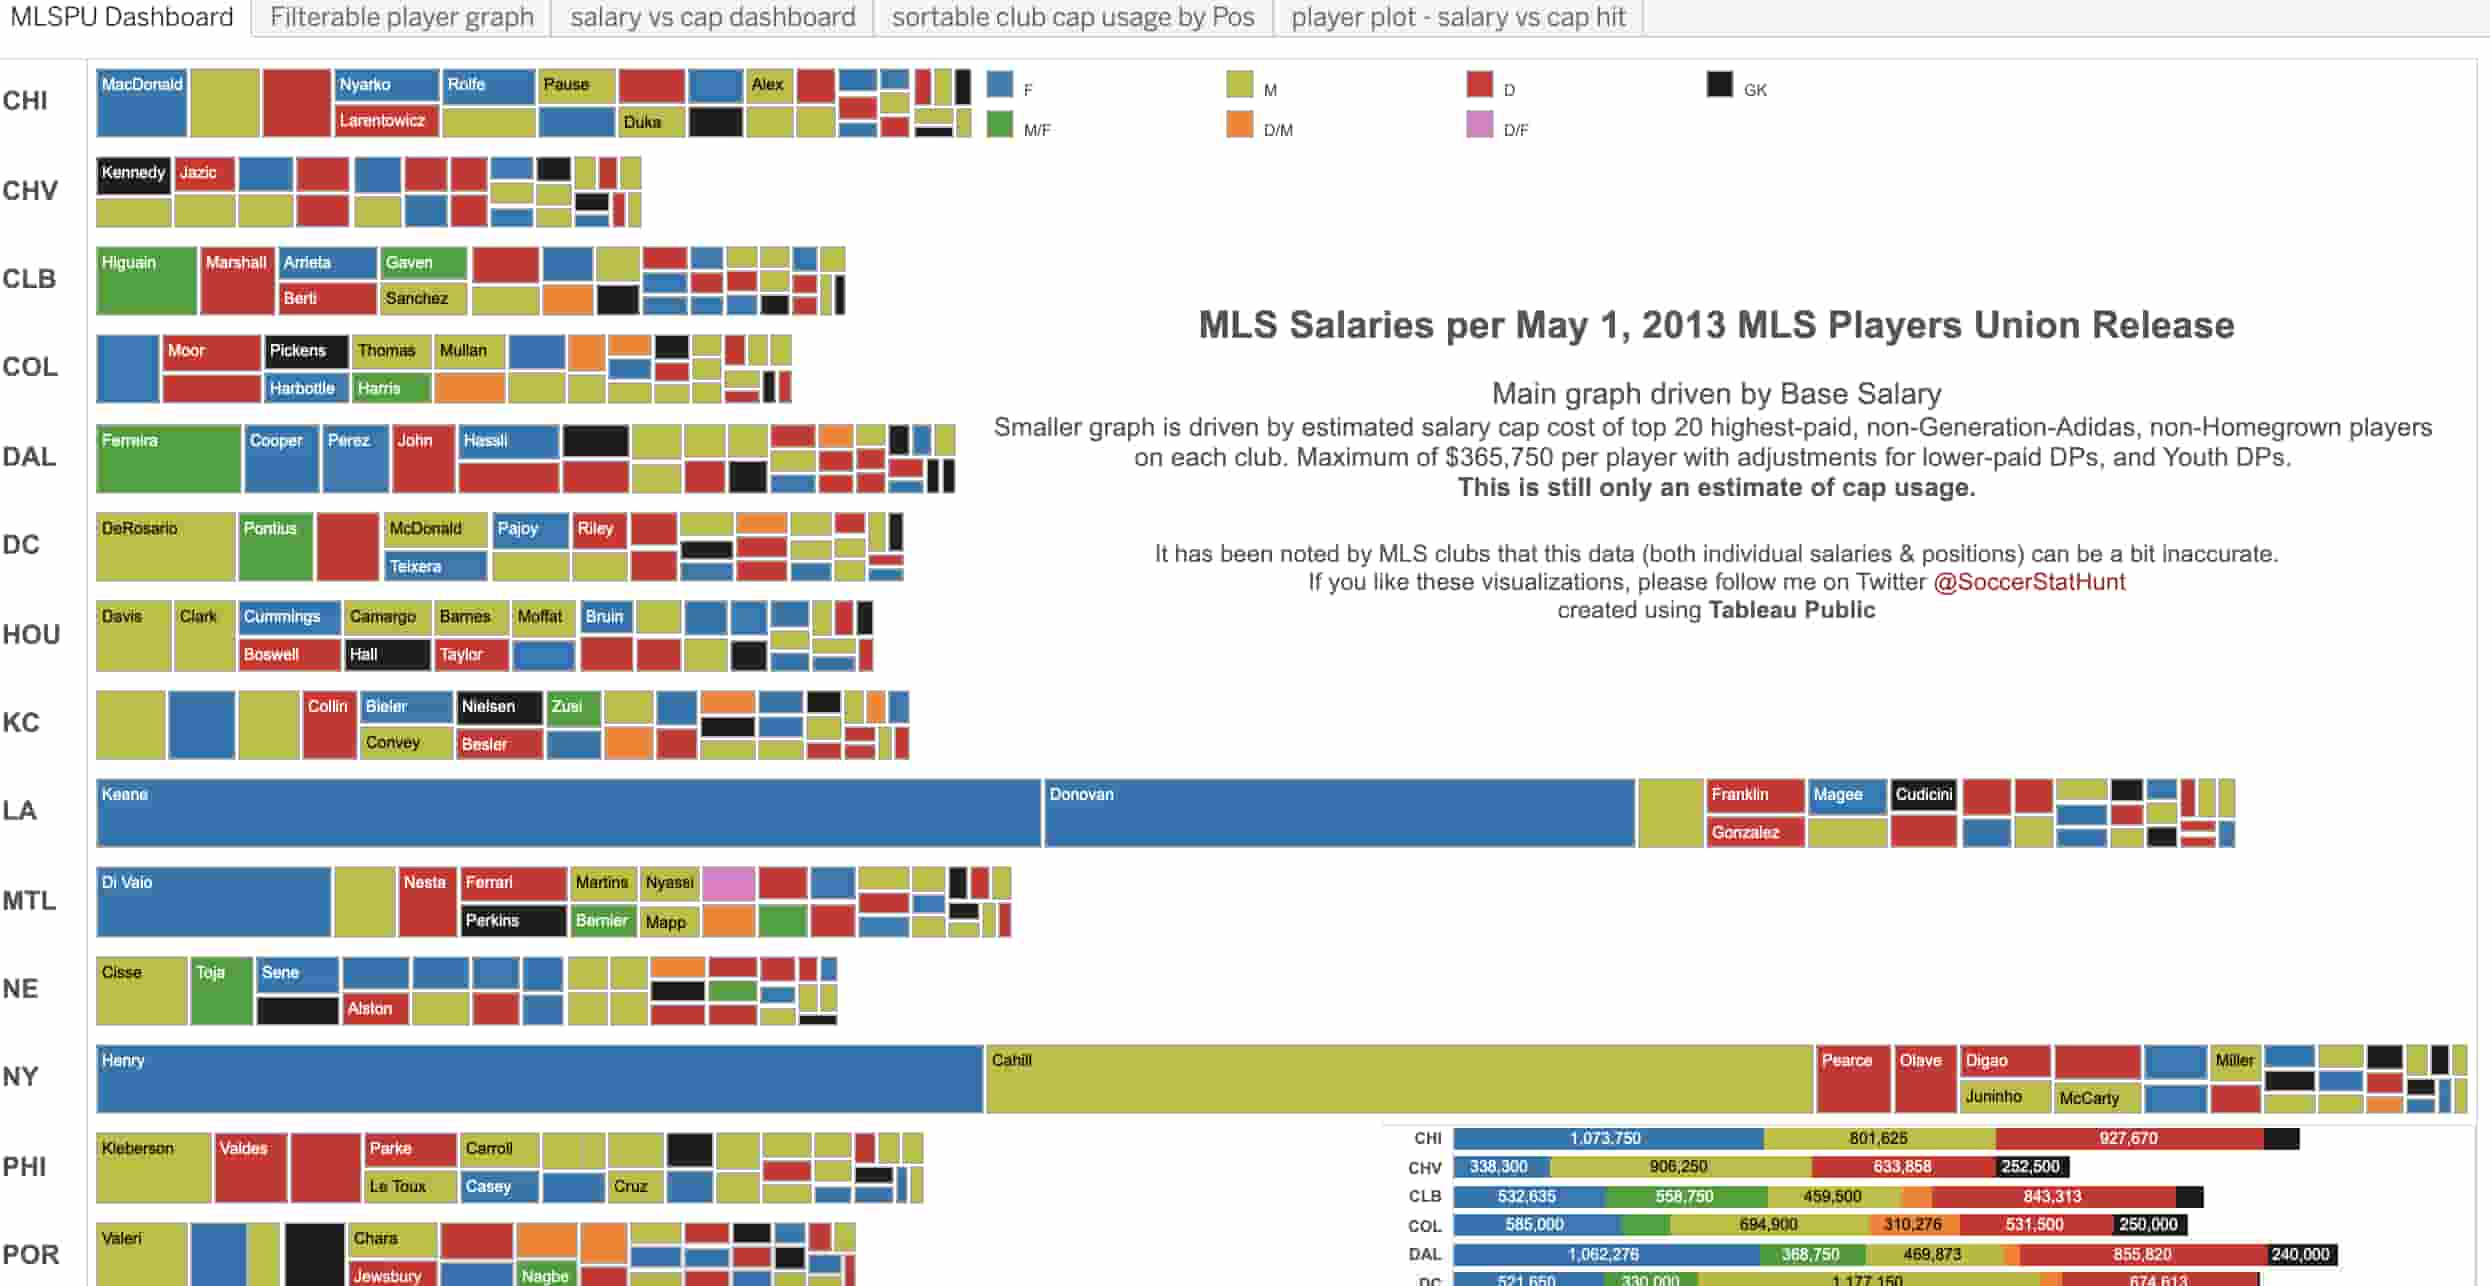
[source](https://blog.hubspot.com/marketing/great-data-visualization-examples) 

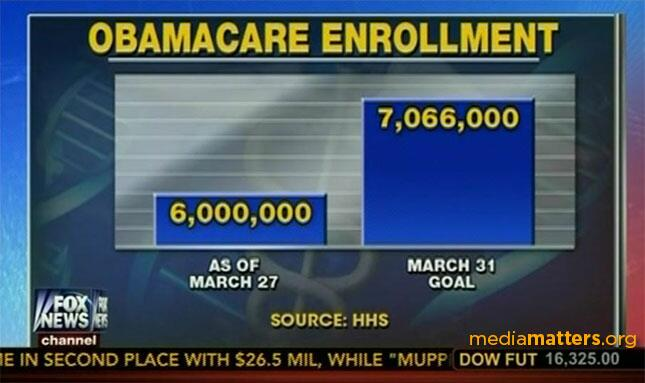
[source](https://flowingdata.com/2014/04/04/fox-news-bar-chart-gets-it-wrong/)

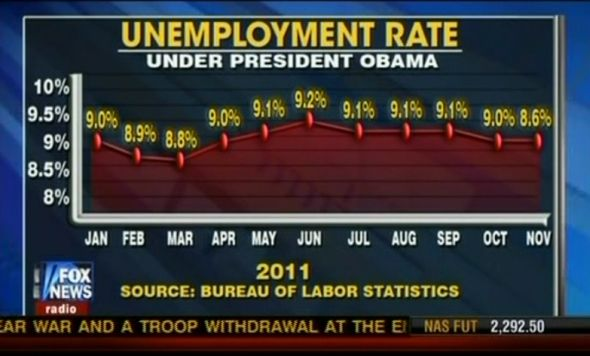
[source](https://flowingdata.com/2011/12/12/fox-news-still-makes-awesome-charts/)

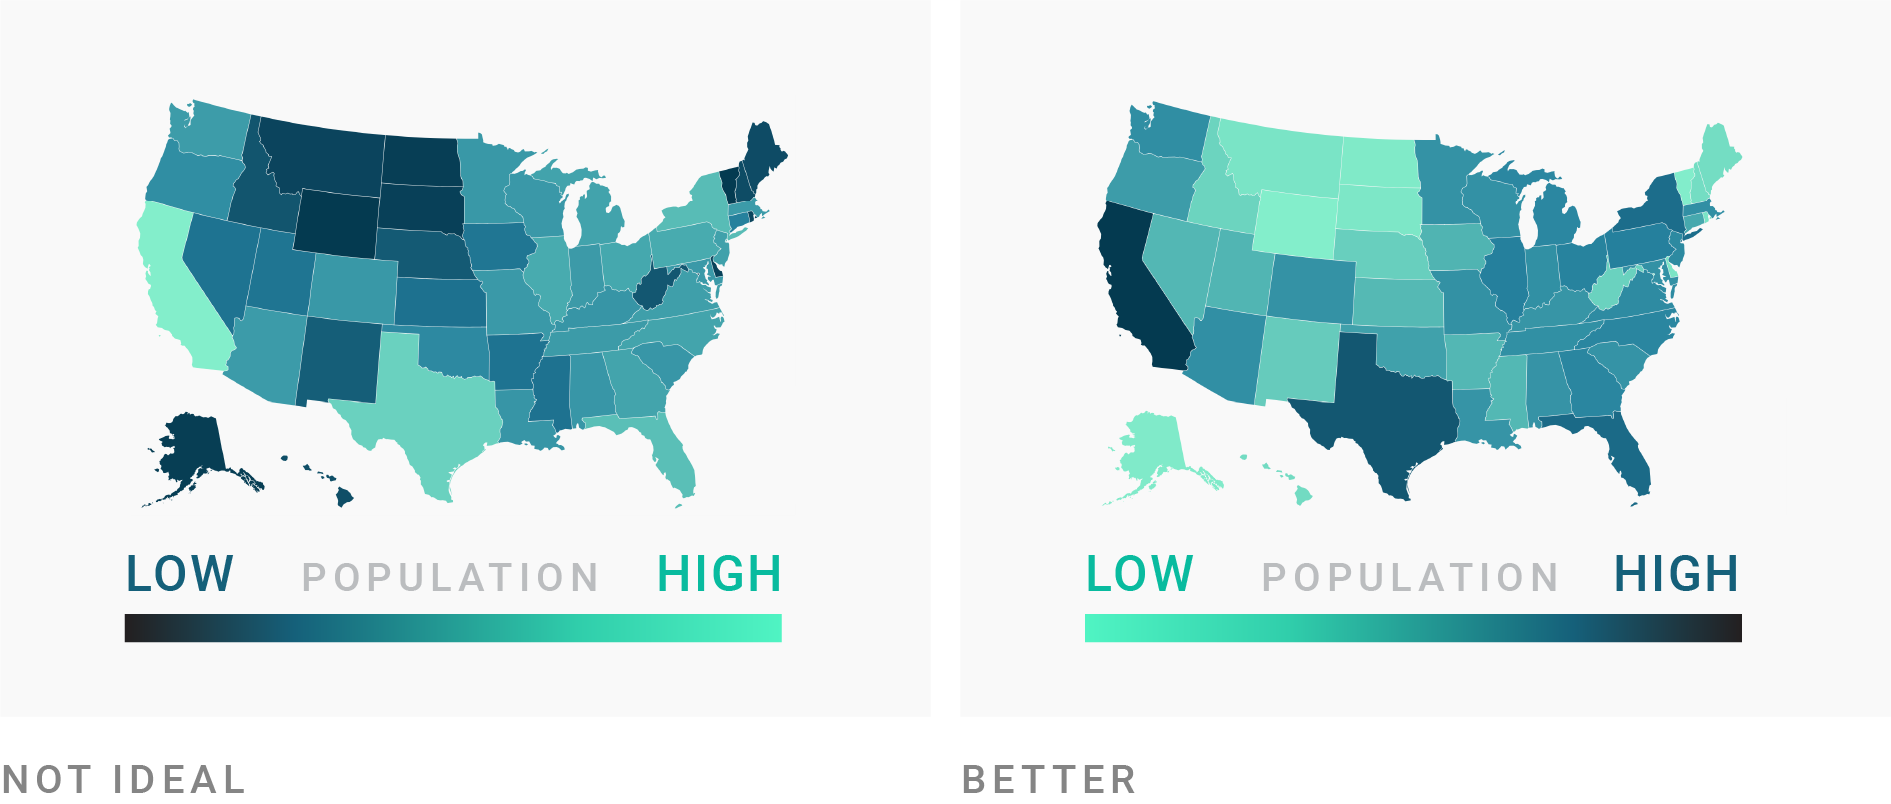
[source](https://academy.datawrapper.de/article/140-what-to-consider-when-choosing-colors-for-data-visualization)

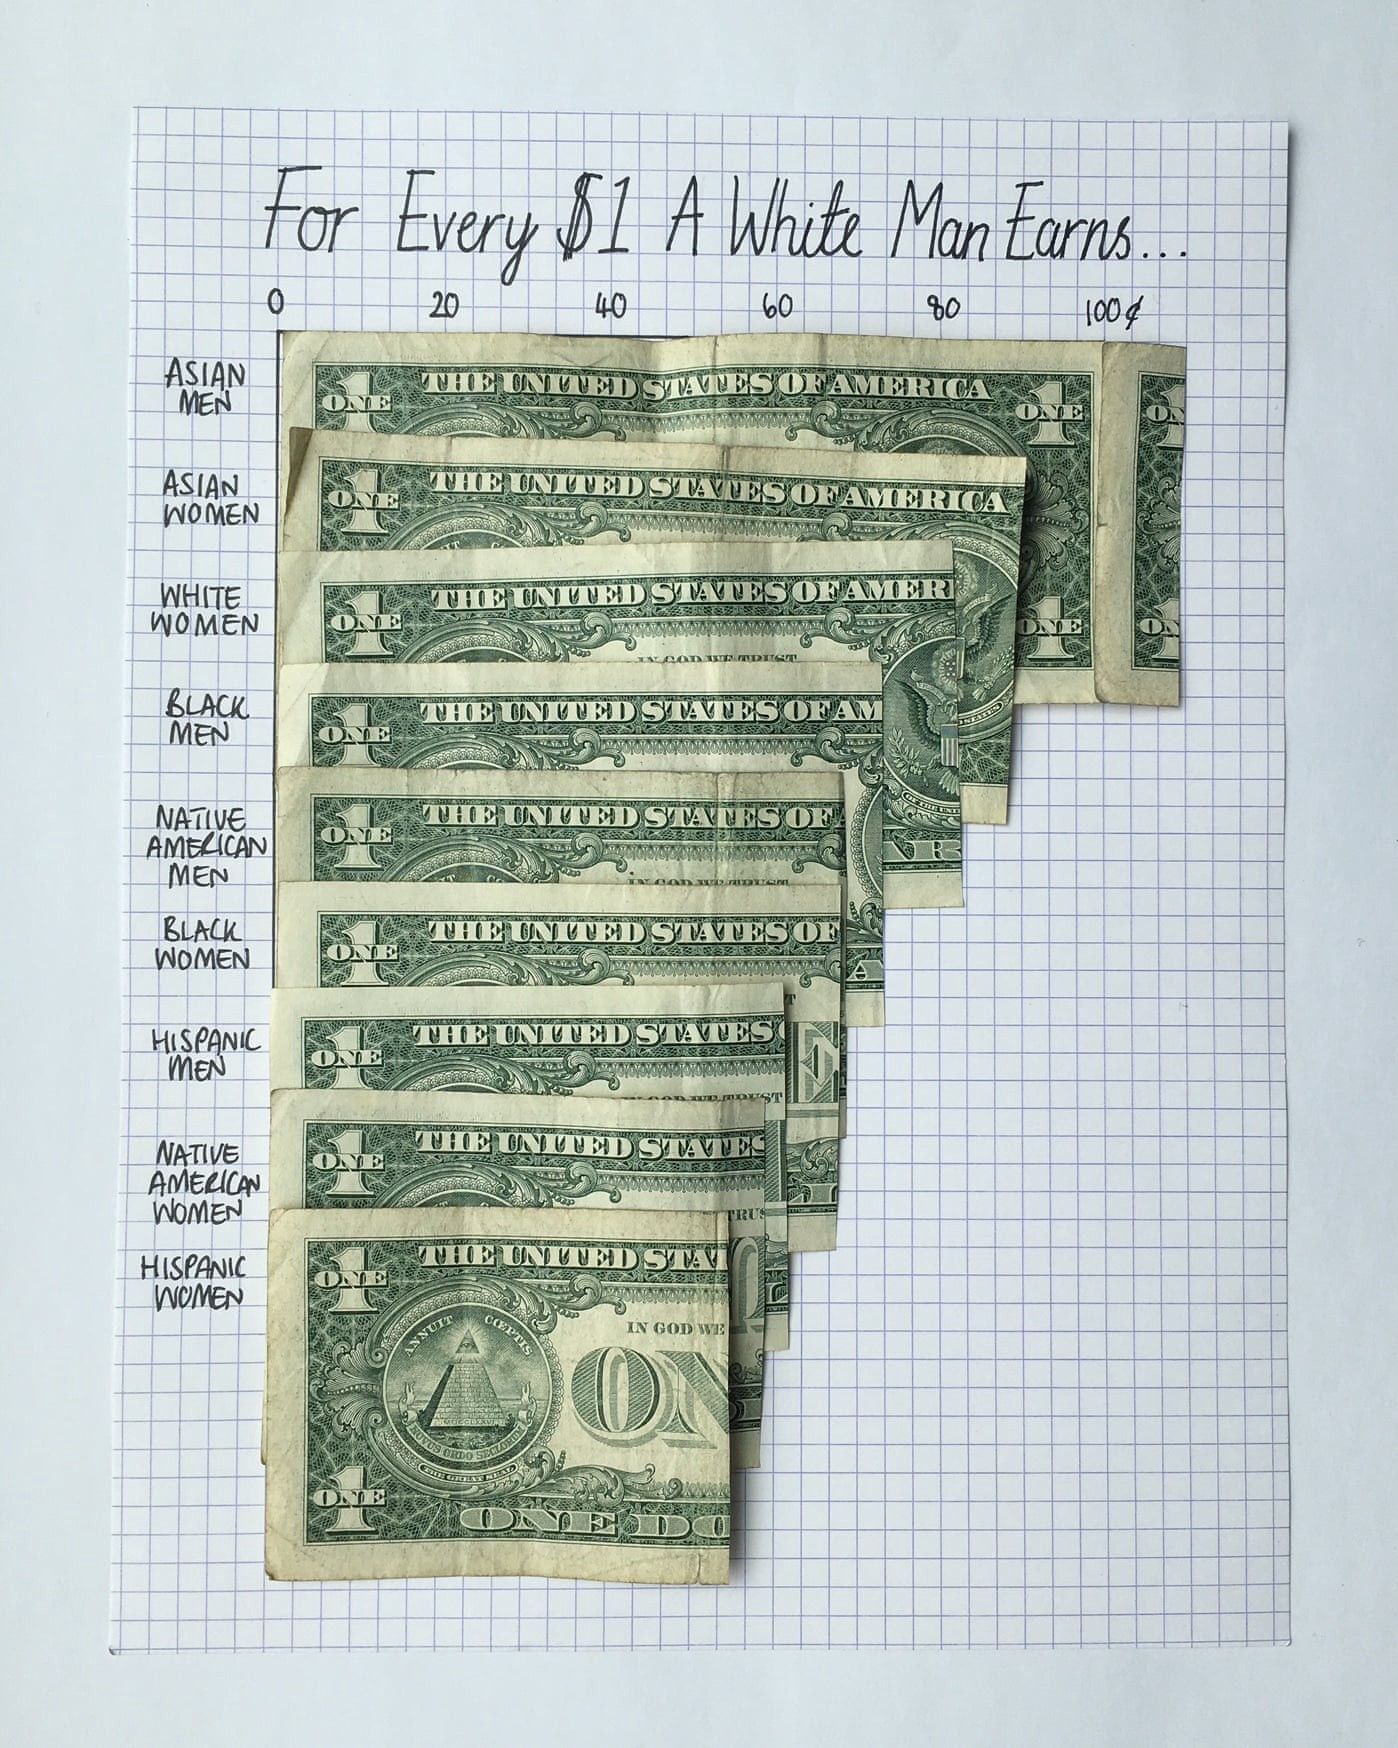
[source](https://medium.com/nightingale/power-to-the-powerless-an-interview-with-mona-chalabi-39d73647d80a)

### 1.1 Why do we need plots? 

- not everybody is keen on numbers
- simple and efficient
- can immediately see trends 
- broader perspective
- to see all the data at once
- a good tool to present work
- to be able to draw conclusions/ see correlation 

### 1.2 Anatomy of a Plot

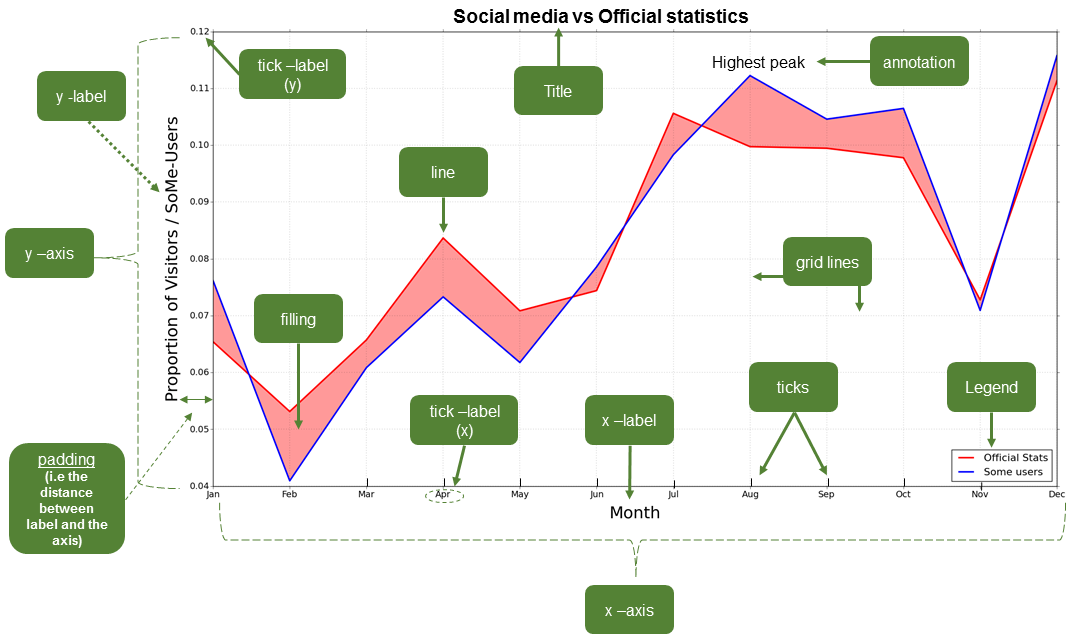
[source](https://geo-python.github.io/2017/lessons/L7/plot-anatomy.html)

<hr style="border:2px solid black">

## 2. Visualizing a dataset

In the Python Data Science community we typically deal with the following three libraries within the matplotlib family:
- pandas
- matplotlob
- seaborn

In [22]:
# import pandas
import pandas as pd

In [23]:
# Load the penguins dataset: two ways, either as a CSV or from Seaborn directly:
df=pd.read_csv('../data/penguins.csv')

In [24]:
# check the shape
df.shape

(344, 7)

In [25]:
# check the Nan-values
df.head()
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [26]:
# drop Nan_values 

df.dropna(inplace=True)

In [27]:
# check the shape again
df.shape

(333, 7)


### 2.1 Plotting with pandas

- plotting with pandas is based on matplotlib, you don't have to import plt!
- plotting with pandas is super practical, because there are in-built methods in the dataframe class
- plotting with pandas is limited, because you don't have all the possibilities to customise plots that matplotlib does


**Let's try to answer following questions!**

1. Do larger penguins have longer flippers?

In [28]:
# list all columns name
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

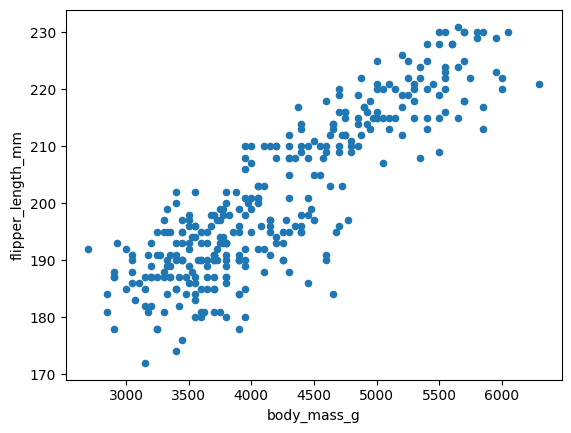

In [29]:
# plot one column against another (body_mass_g','flipper_length_mm')
df.plot.scatter(x='body_mass_g', y='flipper_length_mm')

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

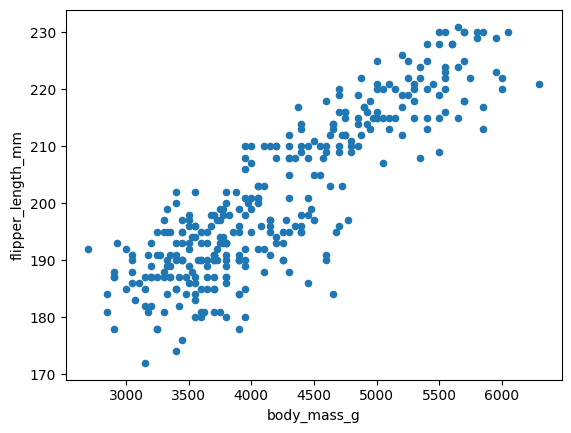

In [30]:
# Can also reference column numbers
df.plot.scatter(x=df.columns[5], y='flipper_length_mm')


2. Visualize the distribution of Bill Length

<Axes: ylabel='Frequency'>

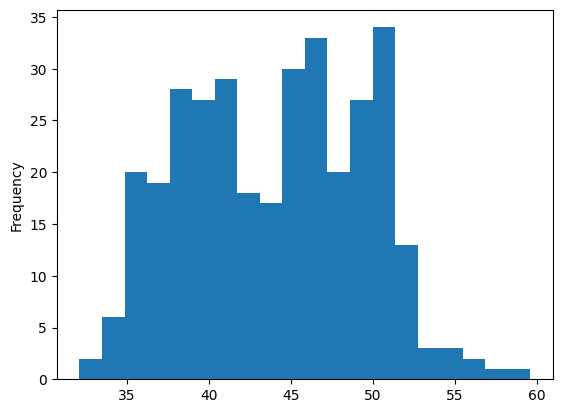

In [31]:
# we have multiple options: histogram, violin, kde (kernel density estimation), boxplot
df['bill_length_mm'].plot.hist(bins=20)



3. Are male penguins heavier than female penguins?

<Axes: ylabel='Frequency'>

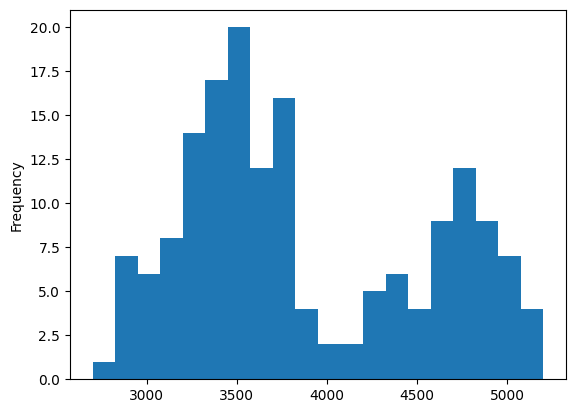

In [32]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(20,6))
# selecting by conditions, plotting two in one, introducing alpha, histogram
df['body_mass_g'].loc[df['sex']=='female'].plot.hist(bins=20, alpha=1)  

<Axes: ylabel='Frequency'>

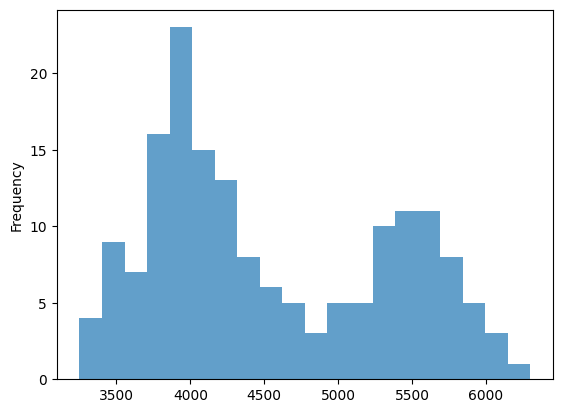

In [33]:
df['body_mass_g'].loc[df['sex']=='male'].plot.hist(bins=20, alpha=0.7)


### 2.2 Plotting with Matplotlib

In [34]:
import matplotlib.pyplot as plt
# print all available styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

[Style sheets reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [35]:
# Call the function once in the beginning of your script/ notebook.
#plt.style.use('ggplot')

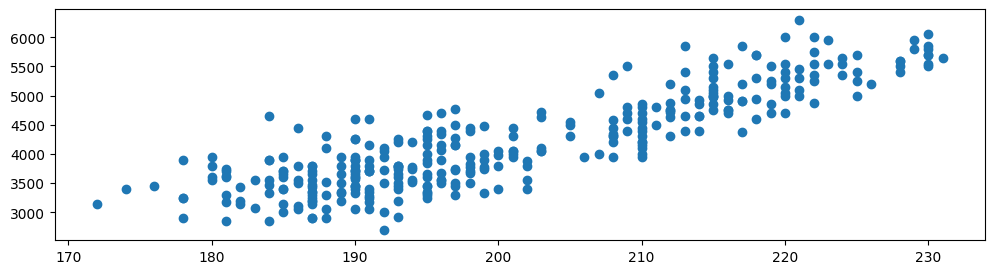

In [36]:
# Also set the figure parameters once at the start:
plt.figure(figsize=(12,3)) #Always first step! Set plot to 12, 6 inches!


# or: plt.plot, plt.bar, plt.boxplot, plt.hist,... 
plt.scatter(df['flipper_length_mm'],df['body_mass_g'])


#plt.show()  

**Add title and labels**

Text(0, 0.5, 'Body mass')

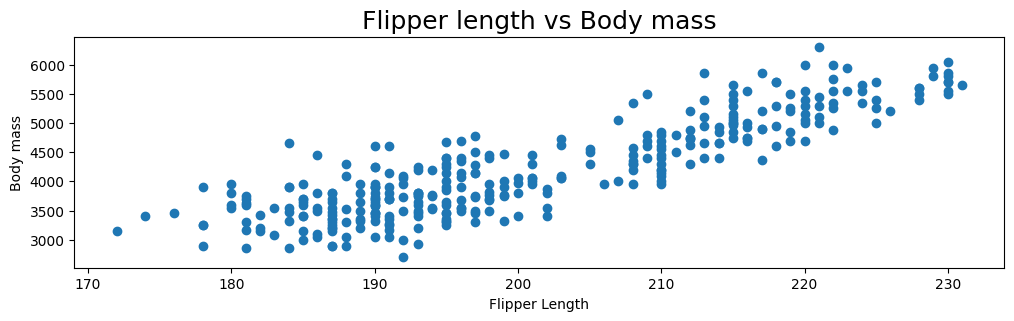

In [37]:
plt.figure(figsize=(12,3)) 
plt.scatter(df['flipper_length_mm'],df['body_mass_g'])
plt.title('Flipper length vs Body mass', fontsize=18)
plt.xlabel('Flipper Length')
plt.ylabel('Body mass')


#plt.show()

**More formatting**

Text(0, 0.5, 'Body Mass (g)')

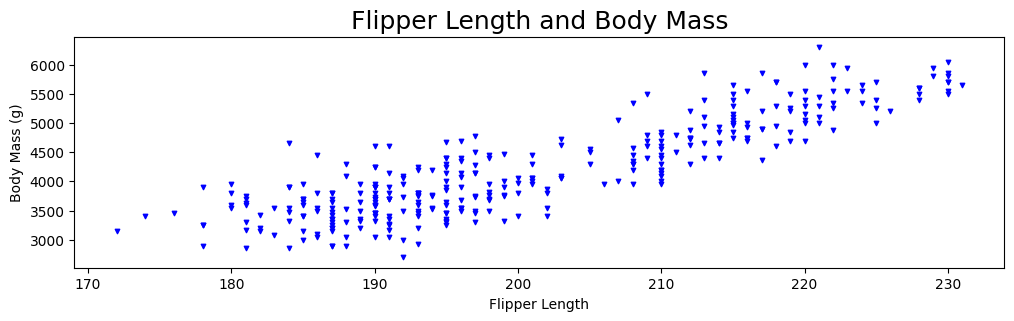

In [38]:
plt.figure(figsize=(12,3)) 

plt.scatter(df['flipper_length_mm'], df['body_mass_g'], s=10, c='blue', marker='v') 
plt.title('Flipper Length and Body Mass', fontsize=18)
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass (g)')
#plt.show()


In [39]:
## Plot different species in different colors, which species do we have?
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [40]:
## Filtering by species
df['body_mass_g'].loc[df['species']=='Gentoo']

152    4500.0
153    5700.0
154    4450.0
155    5700.0
156    5400.0
        ...  
270    4925.0
272    4850.0
273    5750.0
274    5200.0
275    5400.0
Name: body_mass_g, Length: 119, dtype: float64

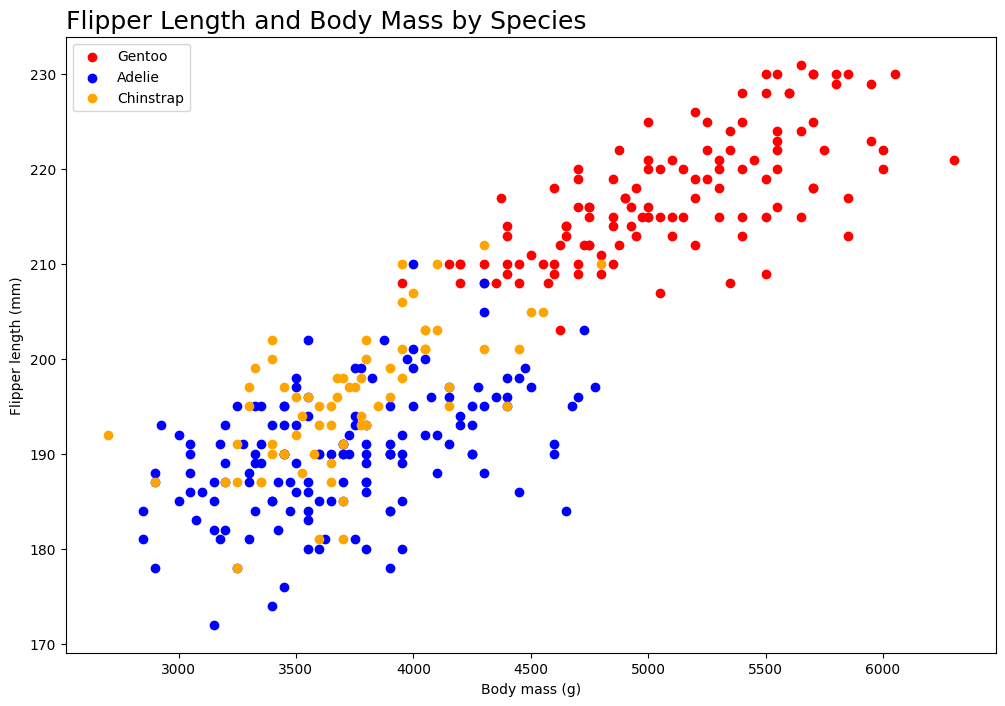

In [43]:
#set plot size
plt.figure(figsize= (12,8))



#plot first species
plt.scatter(df['body_mass_g'].loc[df['species'] == 'Gentoo'], df['flipper_length_mm'].loc[df['species'] == 'Gentoo'], label='Gentoo', c='red')

#plot second one in blue for Adelie
plt.scatter(df['body_mass_g'].loc[df['species'] == 'Adelie'], df['flipper_length_mm'].loc[df['species'] == 'Adelie'], label='Adelie', c='blue')



#plot third one in orange Chinstrap
plt.scatter(df['body_mass_g'].loc[df['species'] == 'Chinstrap'], df['flipper_length_mm'].loc[df['species'] == 'Chinstrap'], label='Chinstrap', c='orange')




#plt title
plt.title('Flipper Length and Body Mass by Species', fontsize=18, loc='left')


#annotate
plt.xlabel('Body mass (g)')
plt.ylabel('Flipper length (mm)')

# rotate data ticks labels


#add legend
plt.legend()

#legend=plt.legend()
#plt.setp(legend.get_texts(), color='b')

## Save the plot as a png file with relative path
plt.savefig('plot.png') 

## Save the plot as a png file with path of choice
save_results_to = 'plots/'
plt.savefig(save_results_to + 'image.png', dpi = 300)


[matplotlib gallery](https://matplotlib.org/stable/gallery/index.html)

### 2.3 Plotting with Seaborn

*More examples in the course material*

In [ ]:
# which islands do we have?
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [49]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Bill length and Depth by species')

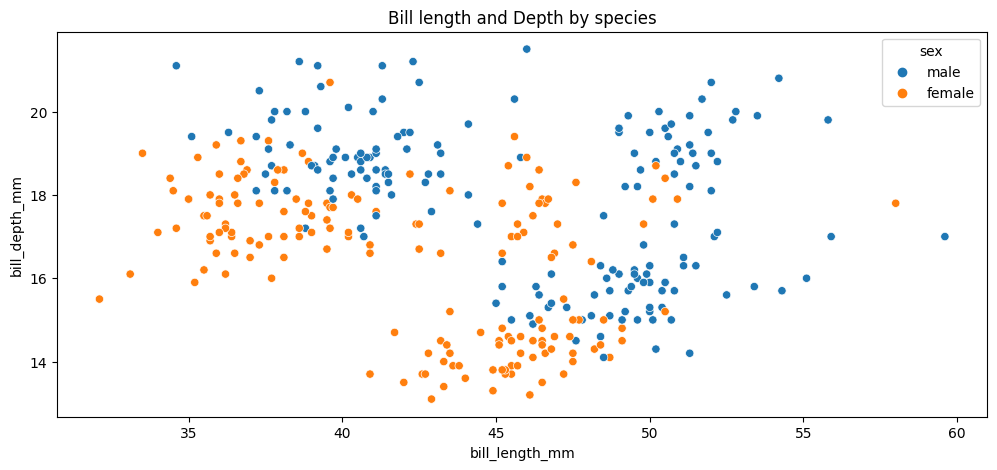

In [50]:
import seaborn as sns
plt.figure(figsize= (12,5))

sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex')

plt.title('Bill length and Depth by species')




#sns.despine()

[seaborn color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

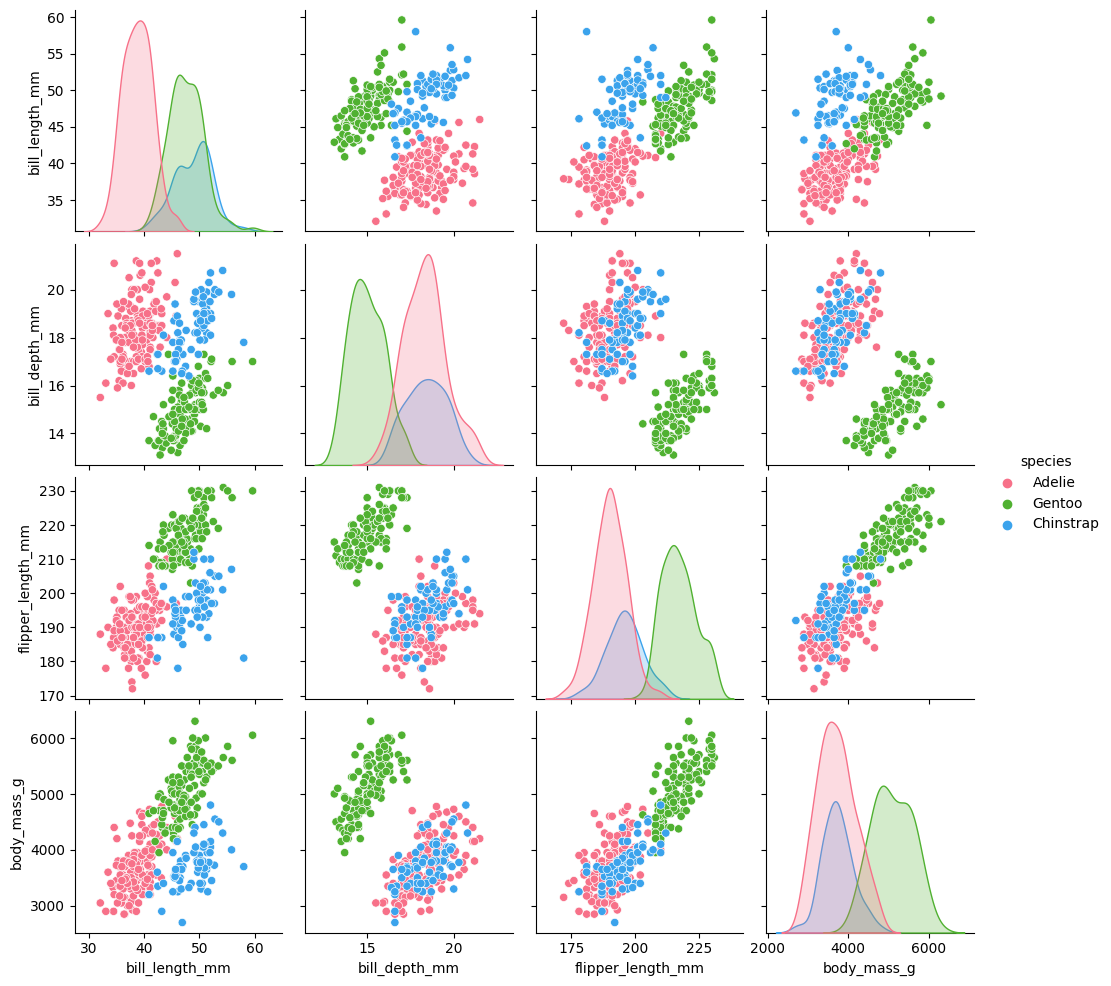

In [53]:
sns.pairplot(df, hue ='species', palette='husl')
sns.despine()

**How to use colors:**



https://academy.datawrapper.de/article/140-what-to-consider-when-choosing-colors-for-data-visualization 

https://projects.susielu.com/viz-palette

<hr style="border:2px solid black">

## 3. More advanced plotting
### 3.1 Subplots
In matplotlib, the "figure" is like a container that holds plots (called "axes"). You can create a grid of plots, e.g. with two plots in one figure like this:

(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

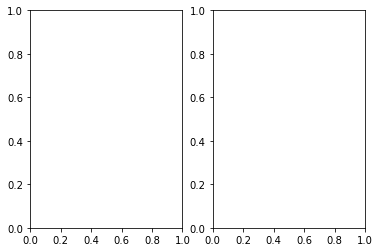

In [ ]:
plt.subplots(nrows=1, ncols=2) 

Bbox(x0=0.125, y0=0.10999999999999999, x1=0.47727272727272724, y1=0.88)


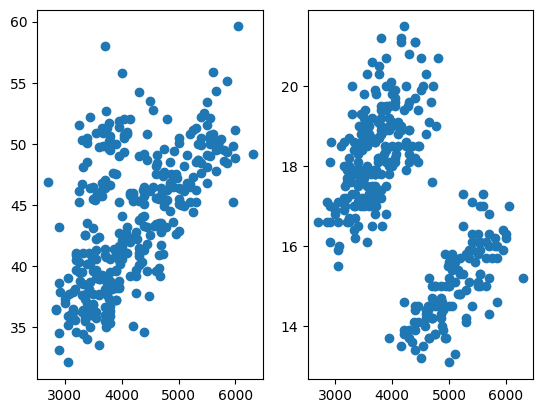

In [61]:
my_plot, (ax1, ax2) = plt.subplots(nrows=1, ncols=2) 
ax1.scatter(df['body_mass_g'], df['bill_length_mm'])   #specifies first plot
ax2.scatter(df['body_mass_g'], df['bill_depth_mm'])     # specifies second plot

### 3.2 "3D Plot"

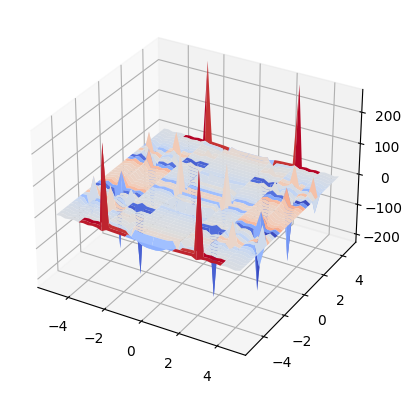

In [62]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**4 + Y**2)
Z = np.tan(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=5, cmap=cm.coolwarm)
plt.show()

<hr style="border:2px solid black">

## 4. Exercise:
- Pick one of the plot functions from the seaborn, 20 minutes



In [102]:
## Distplot

#seaborn.distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)
##DEPRECATED

#This function has been deprecated and will be removed in seaborn v0.14.0. It has been replaced by histplot() and displot(), two functions with a modern API and many more capabilities.

#seaborn.displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)

#Figure-level interface for drawing distribution plots onto a FacetGrid. 
df.columns


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
sns.displot(data=df, x = 'body_mass_g',  y="bill_length_mm")


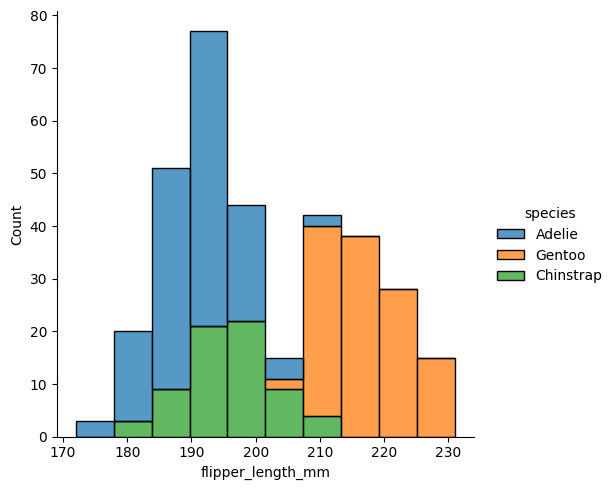

In [89]:
sns.displot(df, x="flipper_length_mm", hue="species", multiple="stack")

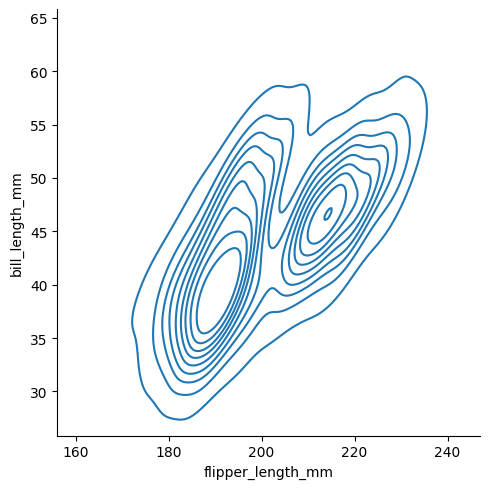

In [76]:
df.columns
sns.displot(data=df, x="flipper_length_mm", y="bill_length_mm", kind="kde")

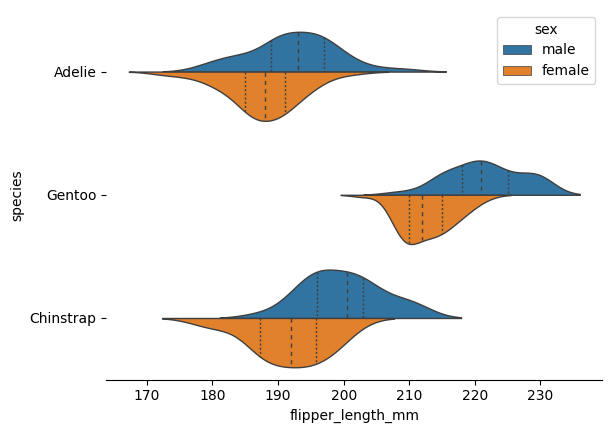

In [97]:

## Violinplot
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df, x="flipper_length_mm", y="species", hue = 'sex',
               split=True, inner="quart", linewidth=1)
sns.despine(left=True)

<Axes: xlabel='species', ylabel='count'>

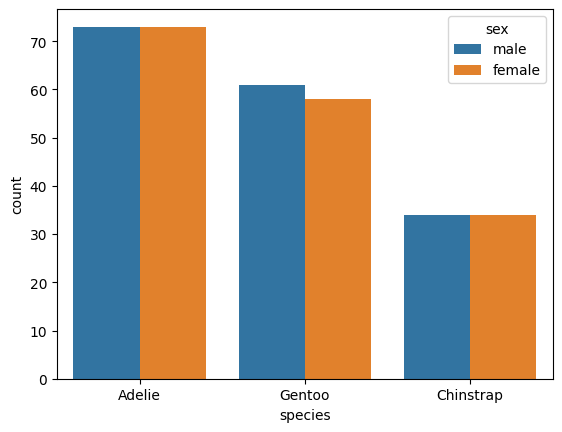

In [98]:

## Countplot
sns.countplot(data=df, x="species", hue="sex")

<Axes: xlabel='body_mass_g', ylabel='species'>

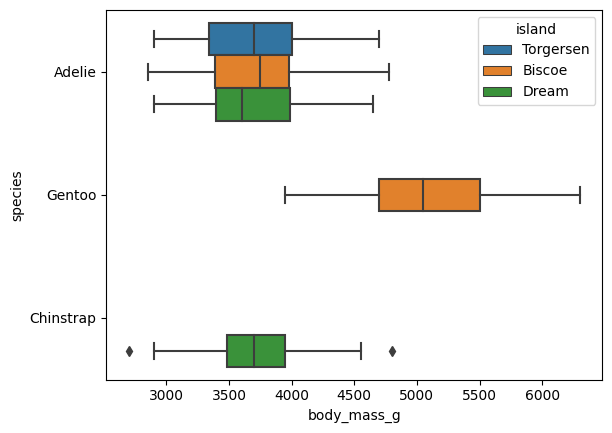

In [103]:


## Boxplot
sns.boxplot(data=df, x="body_mass_g", y="species", hue="island")

In [118]:
sns.set()
flights = sns.load_dataset("flights")
flights


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [119]:

flights = flights.pivot("month", "year", "passengers")
flights

/tmp/ipykernel_11698/3733424118.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights = flights.pivot("month", "year", "passengers")


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


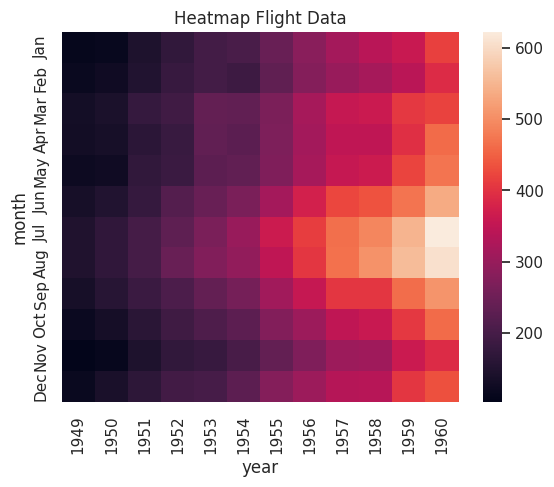

In [121]:

ax = sns.heatmap(flights)
plt.title("Heatmap Flight Data")
plt.show()

In [120]:

## heatmap

sns.set()
df.dropna()
df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [ ]:

flights = df.pivot( "body_mass_g", 'flipper_length_mm')
ax = sns.heatmap(flights)
plt.title("Heatmap Pinquin Data")
plt.show()

### Take Home Message

    1-Understand the context (who, what, how)
    2-Choose an appropriate display (lines, bars, ...)
    3-Eliminate clutter
    4-Draw attention where you want your audience to focus
    5-Think like a designer: Form follows function
    6-Tell a story

### Resources:  
https://towardsdatascience.com/matplotlib-cheat-sheet-f441c43971c4